# Model Visualisation - Cars

In [1]:
setwd('~/Dropbox/github/modelvis/strata-us/data')

In [2]:
library(repr)
options(repr.plot.width=8, repr.plot.height=5)

In [3]:
library(broom)
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [4]:
cars <- read.csv("cars_small.csv")

In [5]:
str(cars)

'data.frame':	42 obs. of  6 variables:
 $ brand: Factor w/ 13 levels "Chevrolet","Fiat",..: 1 1 1 1 2 2 2 3 3 4 ...
 $ model: Factor w/ 42 levels "Alto","Alto 800",..: 4 27 28 30 18 17 23 8 15 3 ...
 $ price: int  421 551 468 345 612 700 499 506 414 519 ...
 $ kmpl : num  18.6 18.2 18.2 16.2 14.9 15.7 15.8 14.1 15.3 18 ...
 $ bhp  : int  79 82 82 62 89 112 67 100 70 87 ...
 $ type : Factor w/ 2 levels "Hatchback","Sedan": 1 2 1 1 2 2 1 2 1 2 ...


In [6]:
ssfit <- smooth.spline(cars$kmpl, cars$price, df=4)

In [7]:
cars <- augment(ssfit, cars)
colnames(cars)[7] <- "price_sspline"
colnames(cars)[8] <- "resid_sspline"

In [8]:
str(cars)

'data.frame':	42 obs. of  8 variables:
 $ brand        : Factor w/ 13 levels "Chevrolet","Fiat",..: 1 1 1 1 2 2 2 3 3 4 ...
 $ model        : Factor w/ 42 levels "Alto","Alto 800",..: 4 27 28 30 18 17 23 8 15 3 ...
 $ price        : int  421 551 468 345 612 700 499 506 414 519 ...
 $ kmpl         : num  18.6 18.2 18.2 16.2 14.9 15.7 15.8 14.1 15.3 18 ...
 $ bhp          : int  79 82 82 62 89 112 67 100 70 87 ...
 $ type         : Factor w/ 2 levels "Hatchback","Sedan": 1 2 1 1 2 2 1 2 1 2 ...
 $ price_sspline: num  494 515 515 588 586 ...
 $ resid_sspline: num  -73.2 35.7 -47.3 -243.5 26.2 ...


In [107]:
loessfit <- loess(price ~ kmpl, cars)

In [108]:
cars <- augment(loessfit, cars)
colnames(cars)[9] <- "price_loess"
colnames(cars)[10] <- "sefit_loess"
colnames(cars)[11] <- "resid_loess"

In [109]:
head(cars)

,brand,model,price,kmpl,bhp,type,price_sspline,resid_sspline,price_loess,sefit_loess,resid_loess
1,Chevrolet,Beat,421,18.6,79,Hatchback,494.1574,-73.15742,473.0713,31.48156,-52.07126
2,Chevrolet,Sail,551,18.2,82,Sedan,515.2684,35.73162,512.3438,33.08282,38.6562
3,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback,515.2684,-47.26838,512.3438,33.08282,-44.3438
4,Chevrolet,Spark,345,16.2,62,Hatchback,588.4727,-243.4727,613.1791,31.83854,-268.1791
5,Fiat,Linea Classic,612,14.9,89,Sedan,585.8212,26.17882,578.0168,38.60453,33.98323
6,Fiat,Linea,700,15.7,112,Sedan,590.9538,109.0462,608.3836,31.89482,91.61645


In [110]:
polyfit <- lm(price ~ poly(kmpl,3), cars)

In [111]:
cars <- augment(polyfit, cars)
colnames(cars)[12] <- "price_poly"
colnames(cars)[13] <- "sefit_poly"
colnames(cars)[14] <- "resid_poly"

In [112]:
head(cars)

,brand,model,price,kmpl,bhp,type,price_sspline,resid_sspline,price_loess,sefit_loess,resid_loess,price_poly,sefit_poly,resid_poly,.hat,.sigma,.cooksd,.std.resid
1,Chevrolet,Beat,421,18.6,79,Hatchback,494.1574,-73.15742,473.0713,31.48156,-52.07126,505.2492,23.55078,-84.24919,0.04210612,115.4476,0.006181825,-0.7500227
2,Chevrolet,Sail,551,18.2,82,Sedan,515.2684,35.73162,512.3438,33.08282,38.6562,526.3738,23.66964,24.62619,0.04253221,116.2381,0.0005339969,0.2192817
3,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback,515.2684,-47.26838,512.3438,33.08282,-44.3438,526.3738,23.66964,-58.37381,0.04253221,115.8975,0.003000409,-0.5197845
4,Chevrolet,Spark,345,16.2,62,Hatchback,588.4727,-243.4727,613.1791,31.83854,-268.1791,593.4083,27.43619,-248.4083,0.05714555,108.4417,0.07528356,-2.229006
5,Fiat,Linea Classic,612,14.9,89,Sedan,585.8212,26.17882,578.0168,38.60453,33.98323,581.523,37.93034,30.47699,0.1092215,116.1905,0.002426543,0.281355
6,Fiat,Linea,700,15.7,112,Sedan,590.9538,109.0462,608.3836,31.89482,91.61645,595.329,28.41574,104.671,0.0612989,114.9477,0.01446524,0.9413045


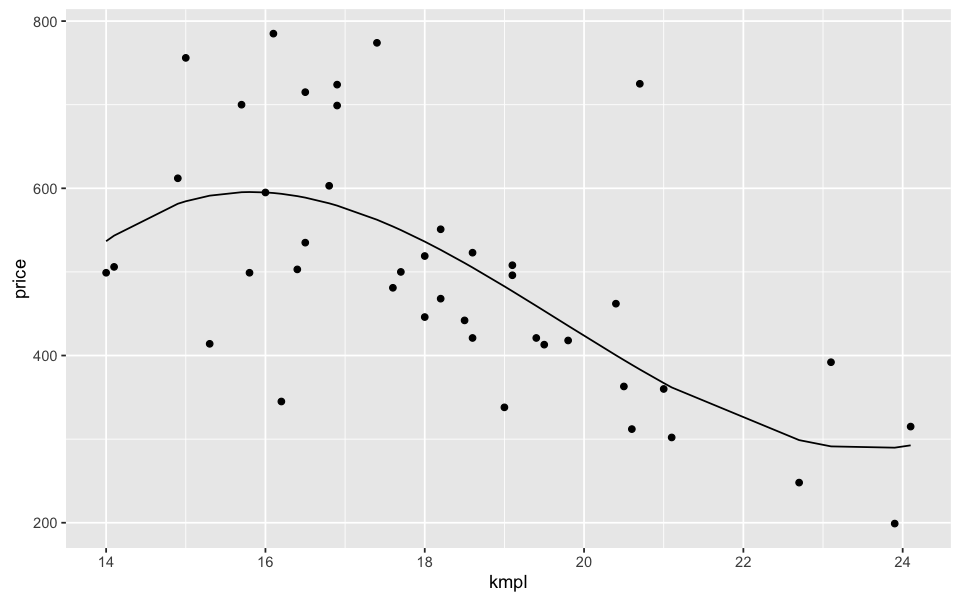

In [115]:
ggplot(cars) + aes(kmpl, price) + geom_point() + geom_line(aes(kmpl,price_poly))

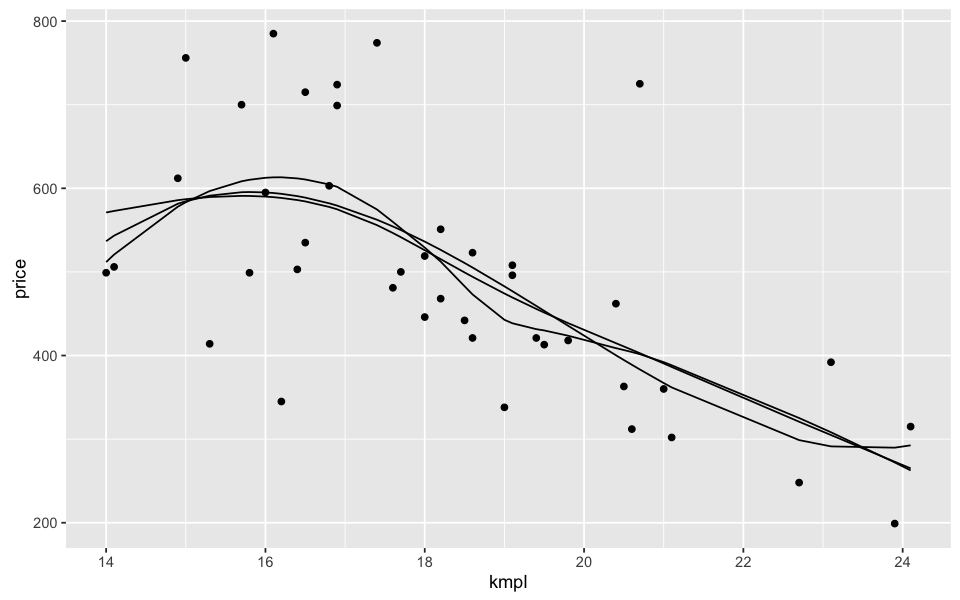

In [113]:
ggplot(cars) + aes(kmpl, price) + geom_point() + geom_line(aes(kmpl,price_sspline)) + 
geom_line(aes(kmpl,price_loess)) + geom_line(aes(kmpl,price_poly))

In [21]:
tidy(lm)

,term,estimate,std.error,statistic,p.value
1,(Intercept),255.316,130.1883,1.961129,0.05722255
2,kmpl,-10.25097,5.000621,-2.049938,0.04731695
3,bhp,4.915137,0.8777422,5.59975,2.015546e-06
4,typeSedan,93.215,28.27609,3.296601,0.002127936


In [19]:
glance(lm)

,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1,0.6519067,0.6340558,89.20938,36.51947,1.156284e-09,3,-246.6606,501.3211,508.2718,310374.2,39


In [122]:
lmfit <- lm( price ~ kmpl + type, cars)

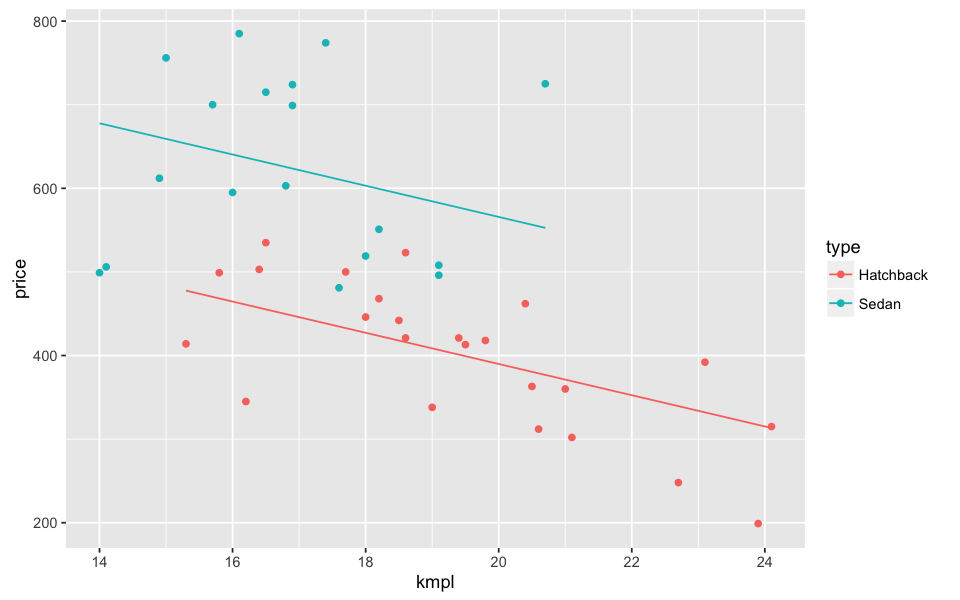

In [123]:
ggplot(cars) + aes(kmpl, price, color = type) + geom_point() + geom_line(aes(y = predict(lmfit)))

In [138]:
cars

,brand,model,price,kmpl,bhp,type,price_sspline,resid_sspline,price_loess,sefit_loess,resid_loess,price_poly,sefit_poly,resid_poly,.hat,.sigma,.cooksd,.std.resid
1,Chevrolet,Beat,421,18.6,79,Hatchback,494.1574,-73.15742,473.0713,31.48156,-52.07126,505.2492,23.55078,-84.24919,0.04210612,115.4476,0.006181825,-0.7500227
2,Chevrolet,Sail,551,18.2,82,Sedan,515.2684,35.73162,512.3438,33.08282,38.6562,526.3738,23.66964,24.62619,0.04253221,116.2381,0.0005339969,0.2192817
3,Chevrolet,Sail Hatchback,468,18.2,82,Hatchback,515.2684,-47.26838,512.3438,33.08282,-44.3438,526.3738,23.66964,-58.37381,0.04253221,115.8975,0.003000409,-0.5197845
4,Chevrolet,Spark,345,16.2,62,Hatchback,588.4727,-243.4727,613.1791,31.83854,-268.1791,593.4083,27.43619,-248.4083,0.05714555,108.4417,0.07528356,-2.229006
5,Fiat,Linea Classic,612,14.9,89,Sedan,585.8212,26.17882,578.0168,38.60453,33.98323,581.523,37.93034,30.47699,0.1092215,116.1905,0.002426543,0.281355
6,Fiat,Linea,700,15.7,112,Sedan,590.9538,109.0462,608.3836,31.89482,91.61645,595.329,28.41574,104.671,0.0612989,114.9477,0.01446524,0.9413045
7,Fiat,Punto Evo,499,15.8,67,Hatchback,590.8643,-91.86431,610.1985,31.86527,-111.1985,595.5465,28.06801,-96.54649,0.0598078,115.1541,0.0119694,-0.867552
8,Ford,Classic,506,14.1,100,Sedan,572.9134,-66.91342,520.7304,69.04077,-14.73043,543.3918,65.3339,-37.39179,0.3240499,116.0712,0.01881958,-0.3962656
9,Ford,Figo,414,15.3,70,Hatchback,589.5633,-175.5633,596.7141,33.09344,-182.7141,591.213,31.34145,-177.213,0.07457149,112.2999,0.05189829,-1.605061
10,Honda,Amaze,519,18,87,Sedan,525.9293,-6.929271,529.1087,34.42486,-10.10866,536.2568,24.02629,-17.25675,0.0438236,116.2756,0.00027091,-0.153765


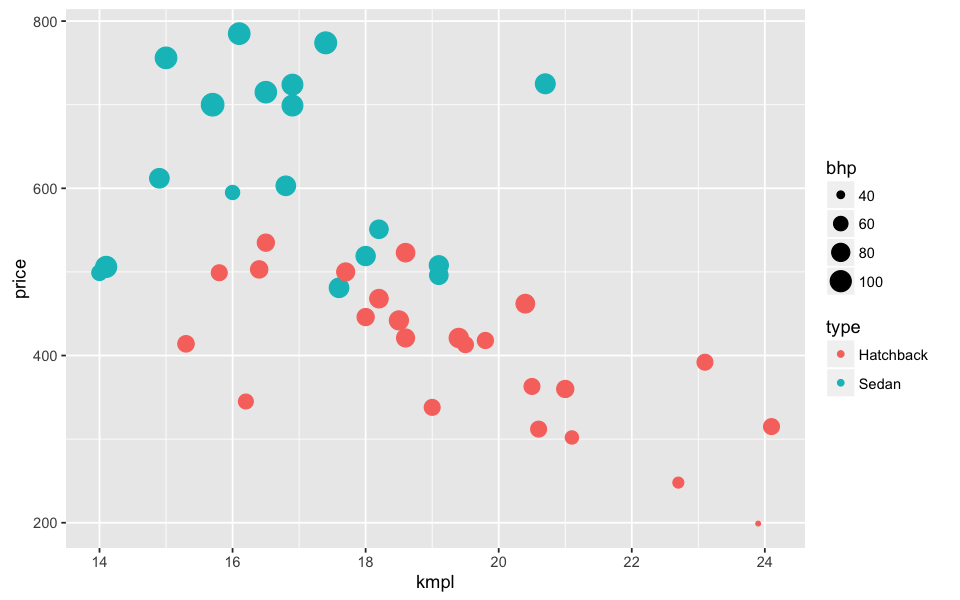

In [159]:
ggplot(cars, aes(kmpl, price, color = type, size = bhp)) + geom_point()

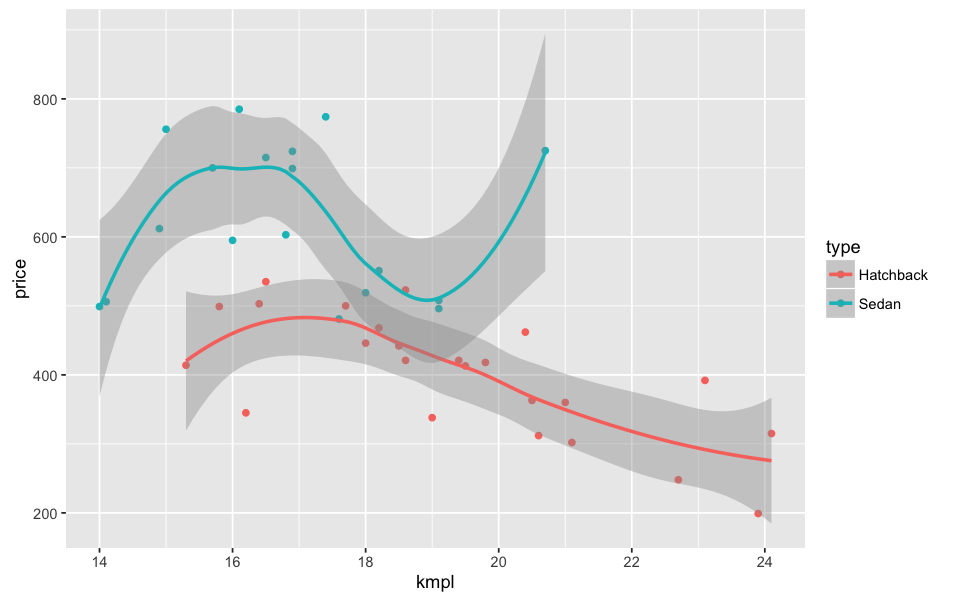

In [158]:
ggplot(cars) + aes(kmpl, price, color = type) + geom_point() + 
stat_smooth(aes(outfit=price_ols_3<<-..y..), method = 'loess')

In [162]:
str(cars)

'data.frame':	42 obs. of  18 variables:
 $ brand        : Factor w/ 13 levels "Chevrolet","Fiat",..: 1 1 1 1 2 2 2 3 3 4 ...
 $ model        : Factor w/ 42 levels "Alto","Alto 800",..: 4 27 28 30 18 17 23 8 15 3 ...
 $ price        : int  421 551 468 345 612 700 499 506 414 519 ...
 $ kmpl         : num  18.6 18.2 18.2 16.2 14.9 15.7 15.8 14.1 15.3 18 ...
 $ bhp          : int  79 82 82 62 89 112 67 100 70 87 ...
 $ type         : Factor w/ 2 levels "Hatchback","Sedan": 1 2 1 1 2 2 1 2 1 2 ...
 $ price_sspline: num  494 515 515 588 586 ...
 $ resid_sspline: num  -73.2 35.7 -47.3 -243.5 26.2 ...
 $ price_loess  : num  473 512 512 613 578 ...
 $ sefit_loess  : num  31.5 33.1 33.1 31.8 38.6 ...
 $ resid_loess  : num  -52.1 38.7 -44.3 -268.2 34 ...
 $ price_poly   : num  505 526 526 593 582 ...
 $ sefit_poly   : num  23.6 23.7 23.7 27.4 37.9 ...
 $ resid_poly   : num  -84.2 24.6 -58.4 -248.4 30.5 ...
 $ .hat         : num  0.0421 0.0425 0.0425 0.0571 0.1092 ...
 $ .sigma       : num  115 1

In [172]:
library(dplyr)
library(broom)
set.seed(123)

bootcars <- cars %>% 
            bootstrap(100) %>%
            do(augment(smooth.spline(.$kmpl, .$price, df=4), .))

In [175]:
plot = ggplot(bootcars, aes(kmpl, price)) + geom_point() +
    geom_line(aes(y=.fitted, group=replicate), alpha=.2)

ggsave("figure/broom.png", plot)

Saving 7 x 7 in image


ERROR: Error in grDevices::dev.off(): QuartzBitmap_Output - unable to open file '/figure/broom.png'
